##Starting story of **KNN**

In [1]:
import os
import math
import pickle
import numpy as np
import pandas as pd
import cv2
from collections import Counter
from pylab import rcParams
import seaborn as sns
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Enable inline plotting
%matplotlib inline

# Load all files in the '/content/sample_data' directory and print their path
for dirname, _, filenames in os.walk('/content/sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv


In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        Data = pickle.load(fo, encoding='latin1')
    return Data

In [3]:
trainData = unpickle('/content/drive/MyDrive/Colab Notebooks/train')
for item in trainData:
    print(item, type(trainData[item]))

filenames <class 'list'>
batch_label <class 'str'>
fine_labels <class 'list'>
coarse_labels <class 'list'>
data <class 'numpy.ndarray'>


In [4]:
testData = unpickle('/content/drive/MyDrive/Colab Notebooks/test')
metaData = unpickle('/content/drive/MyDrive/Colab Notebooks/meta')


print("Fine labels:", metaData['fine_label_names'], "\n")
print("Coarse labels:", metaData['coarse_label_names'])

Fine labels: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', '

In [5]:
subCategory = pd.DataFrame(metaData['fine_label_names'], columns=['SubClass'])
print(subCategory)

         SubClass
0           apple
1   aquarium_fish
2            baby
3            bear
4          beaver
..            ...
95          whale
96    willow_tree
97           wolf
98          woman
99           worm

[100 rows x 1 columns]


In [6]:
X_train = trainData['data']
X_train = X_train.reshape(len(X_train),3,32,32).transpose(0,2,3,1)

In [7]:
X_test = testData['data']
X_test = X_test.reshape(len(X_test),3,32,32).transpose(0,2,3,1)

Image number selected : 12703
Shape of image : (32, 32, 3)
Image subcategory number: 10
Image subcategory name: Bowl


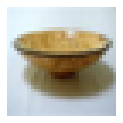

In [8]:
rcParams['figure.figsize'] = 2,2
imageId = np.random.randint(0, len(X_train))
plt.imshow(X_train[imageId])
plt.axis('off')


print("Image number selected : {}".format(imageId))
print("Shape of image : {}".format(X_train[imageId].shape))
print("Image subcategory number: {}".format(trainData['fine_labels'][imageId]))
print("Image subcategory name: {}".format(subCategory.iloc[trainData['fine_labels'][imageId]][0].capitalize()))

In [9]:
winSize = (32,32)
blockSize = (8,8)
blockStride = (4,4)
cellSize = (4,4)
nbins = 9

df = []

In [10]:
for i in range(100):
    image = cv2.cvtColor(X_train[i],cv2.COLOR_BGR2GRAY)
    hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins)
    df.append(hog.compute(image))
    
DF = pd.DataFrame(df)
DF

,0,1,2,3,4,5,6,7,8,9,...,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763
0,0.032799,0.015301,0.045787,0.000000,0.069334,0.000000,0.000000,0.000000,0.032799,0.067754,...,0.098908,0.316263,0.316263,0.248816,0.060455,0.195416,0.000000,0.025893,0.150303,0.213901
1,0.006916,0.000000,0.000000,0.000000,0.241620,0.000000,0.000000,0.000000,0.006916,0.016505,...,0.000000,0.055166,0.000000,0.000000,0.000000,0.699561,0.000000,0.000000,0.000000,0.055166
2,0.327324,0.175260,0.089584,0.062461,0.073516,0.000000,0.000000,0.000000,0.047610,0.327324,...,0.248223,0.292329,0.292329,0.197667,0.280417,0.292329,0.000000,0.000000,0.000000,0.034408
3,0.097244,0.235721,0.044991,0.010438,0.005530,0.000000,0.000000,0.000000,0.008888,0.155014,...,0.058511,0.069262,0.084507,0.002409,0.000000,0.305709,0.124439,0.305709,0.305709,0.095173
4,0.227998,0.040255,0.278890,0.130381,0.014747,0.007472,0.119501,0.278890,0.096910,0.072541,...,0.261557,0.148019,0.049396,0.163622,0.247557,0.261557,0.261557,0.198627,0.261557,0.261557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.054802,0.022137,0.074263,0.267330,0.272681,0.159485,0.075525,0.044720,0.053046,0.272681,...,0.010447,0.078107,0.343656,0.343656,0.270207,0.157476,0.006094,0.000000,0.002915,0.078252
96,0.115432,0.090940,0.081870,0.135823,0.063113,0.024878,0.020010,0.027001,0.059504,0.077096,...,0.164965,0.102926,0.090993,0.068755,0.145587,0.147016,0.047747,0.240445,0.226196,0.240445
97,0.031701,0.000000,0.000000,0.019380,0.114949,0.200439,0.217438,0.032668,0.031701,0.002399,...,0.038150,0.002646,0.000000,0.000000,0.000891,0.151455,0.308880,0.333246,0.333246,0.081468
98,0.004366,0.009671,0.068004,0.297690,0.312550,0.271985,0.006628,0.020288,0.059593,0.061669,...,0.150805,0.213525,0.117104,0.243895,0.072858,0.123870,0.087985,0.243895,0.243895,0.096434


In [11]:
def predict(img,k):
    
    #Extract sample's features
    
    sample = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins)
    _hog = hog.compute(sample)
    
    #Nearest Neighbors
    distances = []
    for i in range(len(DF)):
      # Euclidean distance
        distances.append(np.linalg.norm(_hog - DF.iloc[i]))         
      # IDs in an ascending order  
    kNNsID = np.argsort(distances)[:k]                              
    
    kNNsCats = []
    for i in kNNsID:
      # categories of the NNs
        kNNsCats.append(subCategory.iloc[trainData['fine_labels'][i]][0].capitalize())      
    
    CommonCat = Counter(kNNsCats).most_common(1)                  
    
    return CommonCat

In [12]:
n = 25
p = predict(X_test[n], 20)

In [13]:
def getAccuracy(k, x_test, testdata):
    # Initialize variables
    right_count = 0
    preds = []
    
    # Loop through test instances
    for i in range(1000):
        # Make prediction
        pred = predict(x_test[i], k)
        
        # Compare prediction to true label
        true_label = subCategory.iloc[testdata['fine_labels'][i]][0].capitalize()
        if pred[0][0] == true_label:
            right_count += 1
        
        # Append prediction to list
        preds.append(pred)
    
    # Calculate and print accuracy
    accuracy = right_count / 1000
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    # Return list of predictions
    return preds


In [14]:
Preds14 = getAccuracy(14,X_test,testData)

Accuracy: 2.10%


In [15]:
TruePreds = []

for i in range(1000):
    TruePreds.append(subCategory.iloc[testData['fine_labels'][i]][0].capitalize())

In [16]:
Predicted = []
for i in range(len(Preds14)):
    Predicted.append(Preds14[i][0][0])

In [17]:
cm = confusion_matrix(TruePreds, Predicted)

In [18]:
x = np.array(TruePreds)
len(np.unique(x))

100

In [19]:
cm_df = pd.DataFrame(cm,
                     index = np.unique(x), 
                     columns = np.unique(x))


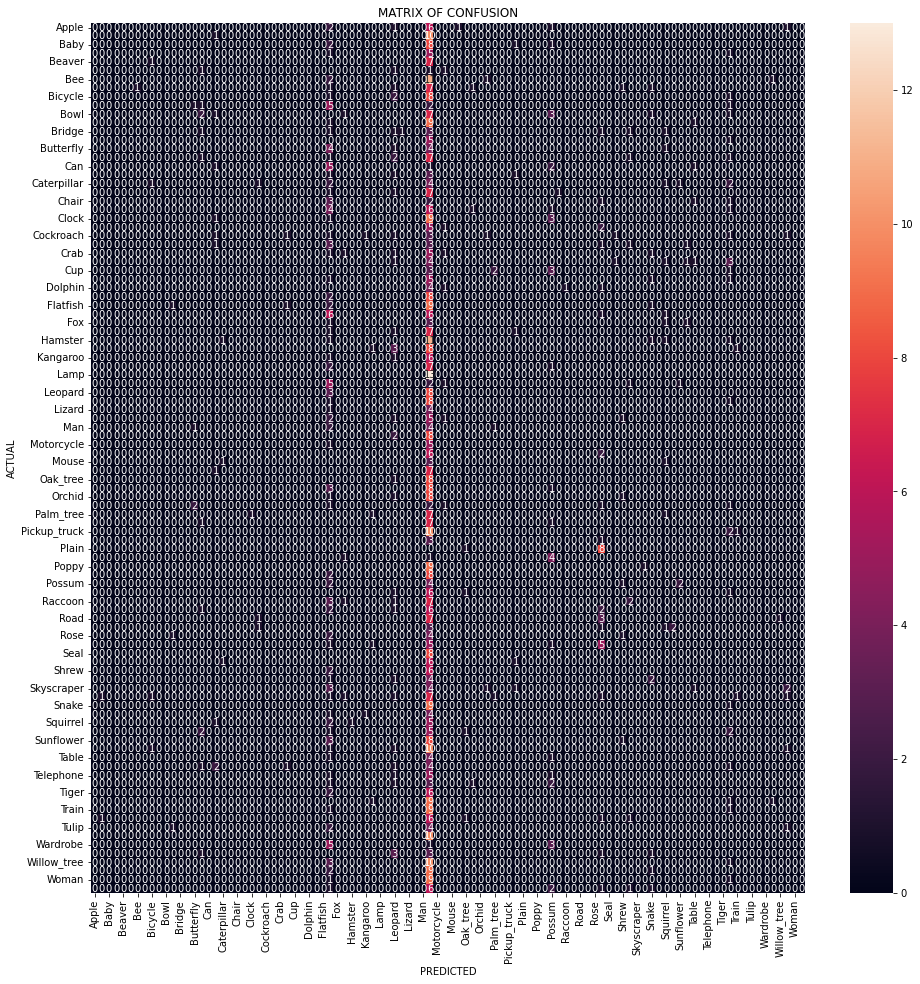

<Figure size 144x144 with 0 Axes>

In [20]:
plt.figure(figsize=(16,16))
sns.heatmap(cm_df, annot=True)
plt.title('MATRIX OF CONFUSION')
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
plt.show()
plt.savefig('KNN.png')